In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rioxarray as rxr 
import numpy as np
from shapely.geometry import mapping

from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

In [2]:
sns.set(font_scale=1.5, style="darkgrid")

In [3]:
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [4]:
pre_DTM_hill_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")

pre_DTM_hill = rxr.open_rasterio(pre_DTM_hill_path,
                                 masked=True)

DTM_hill_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")

DTM_hill = rxr.open_rasterio(pre_DTM_hill_path,
                                 masked=True)

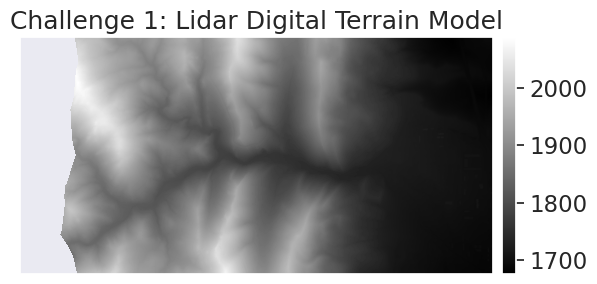

In [5]:
f, ax = plt.subplots()


ep.plot_bands(pre_DTM_hill,
              cmap="gray",
              ax=ax,
              title="Challenge 1: Lidar Digital Terrain Model")

ep.plot_bands(DTM_hill,
              cmap="gray",
              alpha=0.7,
              ax=ax,
              cbar=False)

plt.show()

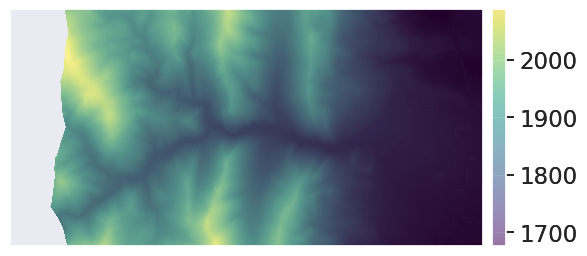

In [6]:
f, ax = plt.subplots()

ep.plot_bands(pre_DTM_hill,
              cmap="gray",
              ax=ax)
ep.plot_bands(DTM_hill,
              alpha=0.5,
              cmap='viridis',
              ax=ax,
              title="Challenge 2: Lidar Digital Terrain Model with Overlay")


plt.show()

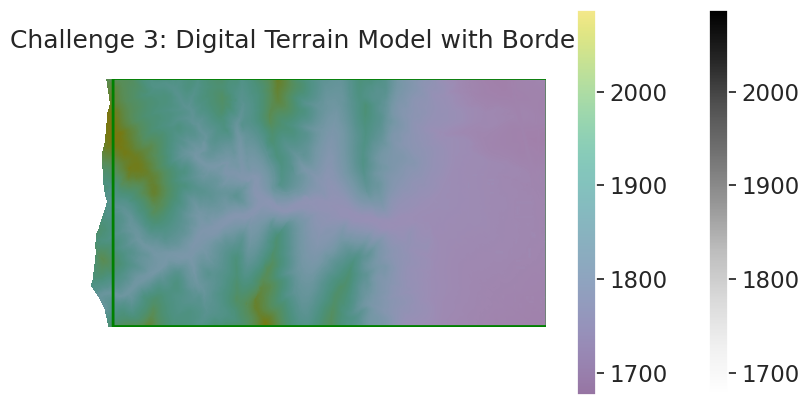

In [17]:
site_bound_path = os.path.join("colorado-flood",
                               "spatial",
                               "boulder-leehill-rd",
                               "clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)


f, ax = plt.subplots(figsize=(10, 5))

pre_DTM_hill.plot(cmap="Greys",
                  ax=ax,)

DTM_hill.plot(alpha=0.5,
              cmap='viridis',
              ax=ax)

site_bound_shp.plot(color='None',
                    edgecolor='Green',
                    linewidth=2,
                    ax=ax,
                    zorder=4)


ax.set(title="Challenge 3: Digital Terrain Model with Border")
ax.axis('off')
plt.show()

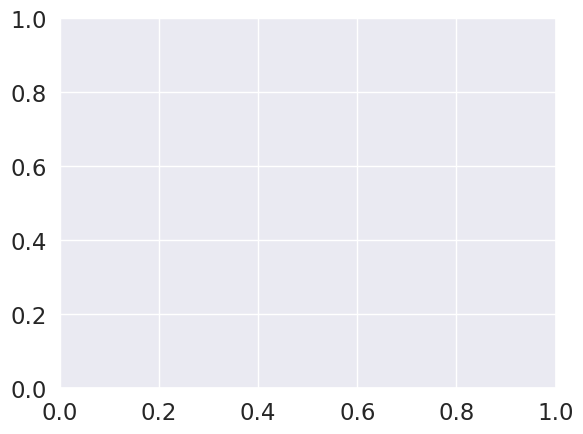

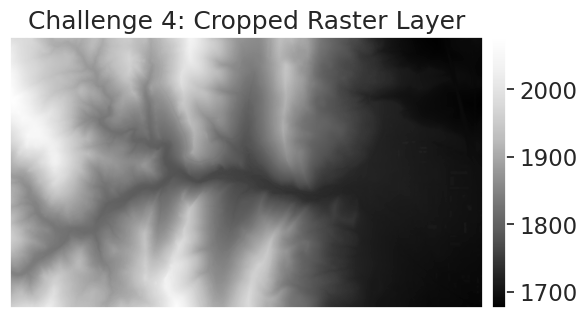

In [8]:
f, ax = plt.subplots()



DTM_clipped = pre_DTM_hill.rio.clip(site_bound_shp.geometry.apply(mapping))

f, ax = plt.subplots()

ep.plot_bands(DTM_clipped,
              ax=ax,
              title="Challenge 4: Cropped Raster Layer")



plt.show()
